In [1]:
push!(LOAD_PATH, "../src")
using VariableHeightInvertedPendulum
using Polynomials

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Parameters
g = 9.8
x0 = -0.3
z0 = 1.
zd0 = 0.
zf = 1.

1.0

In [3]:
orbital_energies = Dict("Eo_negative" => -0.1, "Eo_zero" => 0., "Eo_positive" => 0.1);

In [4]:
models = []
lipm = LIPM("lipm", g, zf)
push!(models, lipm)
# push!(models, PolynomialVariableHeightModel("slope", g, Poly([zf, 0.2])))
push!(models, PolynomialVariableHeightModel("variable_height", g, Poly([zf, 0.2, 0.5])));

scenarios = Scenario[]
for model in models
    for kv in orbital_energies
        scenario_name = first(kv)
        Eo = last(kv)
        xd0 = velocity_given_orbital_energy(model, x0, Eo)
        initial_conditions = [x0; xd0]
        scenario = Scenario(scenario_name, model, initial_conditions)
        push!(scenarios, scenario)
    end
end

In [5]:
# for scenario in scenarios
#     run_scenario(scenario)
# end

In [6]:
function run_solved_trajectory(name, x0, z0, xd0, zd0; kwargs...)
    traj = zero_orbital_energy_trajectory(x0, z0, xd0, zd0, g, zf)
    trajectory_solved_model = PolynomialVariableHeightModel("trajectory_solved", g, traj)
    sim_movie(Scenario(name, trajectory_solved_model, [x0; xd0]); restrict_ztraj = true, kwargs...)
end

run_solved_trajectory (generic function with 1 method)

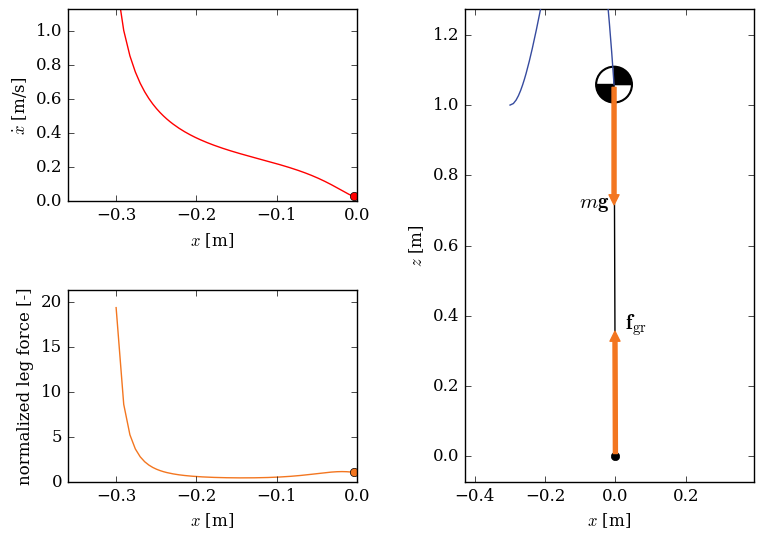

In [7]:
run_solved_trajectory("too_fast", x0, z0, 1.3, zd0; simtime = 1.5)

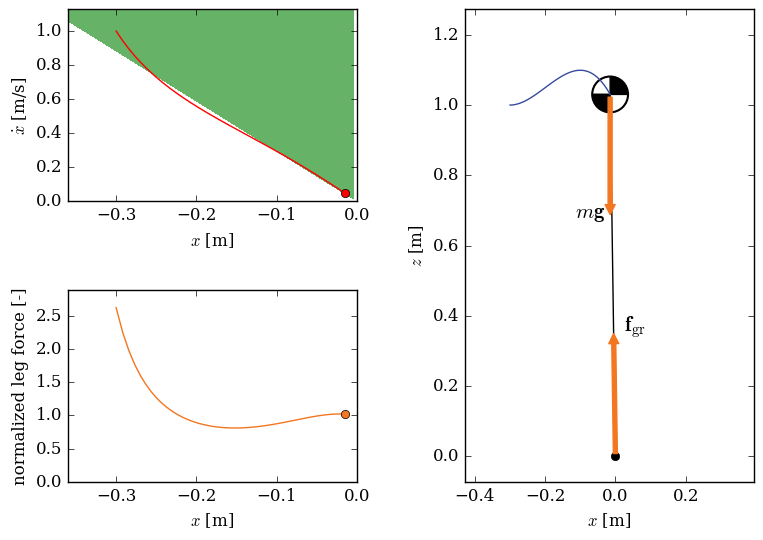

In [8]:
run_solved_trajectory("fast_w_region", x0, z0, 1., zd0; show_region = true)

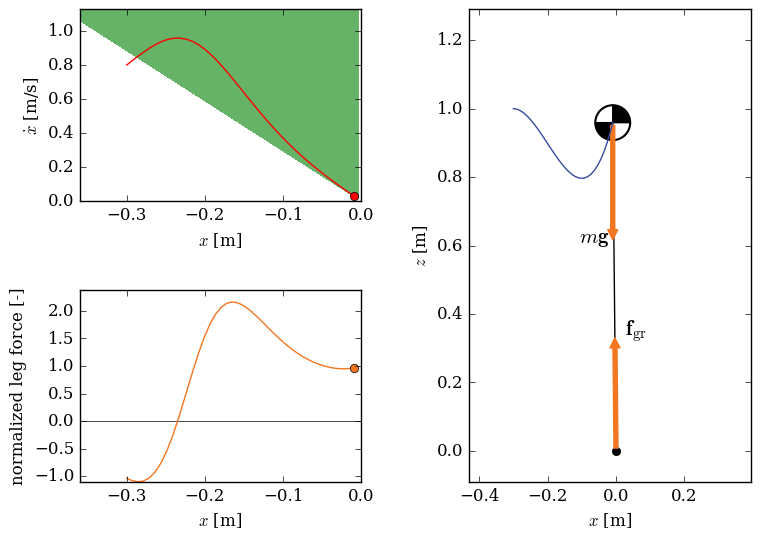

In [9]:
run_solved_trajectory("too_slow_w_region", x0, z0, 0.8, zd0; show_region = true)

In [10]:
# Variable height at same initial conditions that are too slow for LIPM
Eo = -0.04
xd0 = velocity_given_orbital_energy(lipm, x0, Eo)
kwargs = [(:model_only, true), (:simtime, 1.5), (:show_orbital_energy, false), (:stilltime, 1.), (:fig_size, (4., 3.))]
run_scenario(Scenario("comparison", lipm, [x0; xd0]); kwargs...)
run_solved_trajectory("comparison", x0, z0, xd0, zd0; kwargs...)

LoadError: LoadError: UndefVarError: run_scenario not defined
while loading In[10], in expression starting on line 5

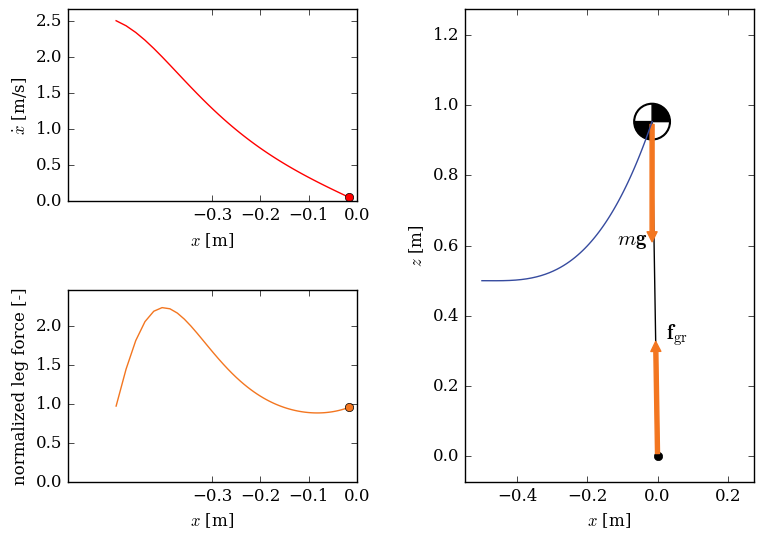

In [11]:
run_solved_trajectory("step_up", -0.5, 0.5, 2.5, 0.)